In [1]:
import pandas as pd
import numpy as np
import feather
import matplotlib as mpl
mpl.use('nbAgg')
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import sklearn.decomposition as skde
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
%matplotlib inline

In [2]:
pingfInfoFilePath = './data/dv_personas_190411_abt'
dv_personas_190411_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,28.0,2ec47253d8c59fa32f000519d2f9b83c26c7f11dcc1ed8...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,M,Acceso a Segundo Ciclo,Ninguno,24,21.0,2d2f9c8a7e3c780fef578a2be45f60d537480aeaf01a88...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,21,37.0,df8a544bdeb3b60dfe3c5ab2abce943b2e8769ca4693ce...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Título Universitario,Ninguno,32,78.0,0b7cafeb91821d6c39ccc2f3058edd9c77f351f0047f1a...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Procedemos a obtener las dummies de sexo, tipo_acceso y tipo_erasmus

In [3]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [4]:
dv_personas_190411_model_one_hot = pd.get_dummies(data=dv_personas_190411_model,columns=categoricalCols)

In [5]:
dv_personas_190411_model_one_hot.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,26,28.0,2ec47253d8c59fa32f000519d2f9b83c26c7f11dcc1ed8...,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,24,21.0,2d2f9c8a7e3c780fef578a2be45f60d537480aeaf01a88...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,21,37.0,df8a544bdeb3b60dfe3c5ab2abce943b2e8769ca4693ce...,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,32,78.0,0b7cafeb91821d6c39ccc2f3058edd9c77f351f0047f1a...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [6]:
dv_personas_190411_model_one_hot.drop(['dni'],axis=1,inplace = True)

#### El primer proceso de clasificación va a ser una regresión logística que tratará de clasificar si una persona va a trabajar más de un 50 % o no.
#### Procedemos a cambiar el valor de la variable objetivo (tto_pcto_dias_trabajados)

In [7]:
dv_personas_190411_model_one_hot_50 = dv_personas_190411_model_one_hot.copy()

In [8]:
dv_personas_190411_model_one_hot_50.loc[dv_personas_190411_model_one_hot_50['tto_pcto_dias_trabajados'] < 50,'tto_pcto_dias_trabajados']=0

dv_personas_190411_model_one_hot_50.loc[dv_personas_190411_model_one_hot_50['tto_pcto_dias_trabajados'] >= 50,'tto_pcto_dias_trabajados']=1

dv_personas_190411_model_one_hot_50.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,Titulacion_is_DIPLOMADO EN TERAPIA OCUPACIONAL,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,21,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,26,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,24,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,21,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,32,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### Comenzamos con el primer proceso de Regresión Logística

In [9]:
dv_personas_190411_model_one_hot_50_scaler = preprocessing.MinMaxScaler().fit_transform(dv_personas_190411_model_one_hot_50)
dv_personas_190411_model_one_hot_50_scaler = pd.DataFrame(dv_personas_190411_model_one_hot_50_scaler,columns=dv_personas_190411_model_one_hot_50.columns)
dv_personas_190411_model_one_hot_50_scaler.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,Titulacion_is_DIPLOMADO EN TERAPIA OCUPACIONAL,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.135135,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.081081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.297297,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [10]:
Features_1_2 = dv_personas_190411_model_one_hot_50_scaler.iloc[:,0:1]
Features_2_2 = dv_personas_190411_model_one_hot_50_scaler.iloc[:,2:]
Labels = dv_personas_190411_model_one_hot_50_scaler['tto_pcto_dias_trabajados']

In [11]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [12]:
Labels = np.array(Labels)
Labels[:10]

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 1.])

In [13]:
Labels.shape

(14320,)

Probamos con 80% para entrenamiento y 20% para las pruebas

In [14]:
x_train, x_test, y_train, y_test = ms.train_test_split(Features,Labels,test_size=0.20, random_state=42)

In [15]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-1.63195774]
[[ 2.26959201 -0.55963237 -0.9147589   0.52656286  0.14399125 -1.98622798
   0.98026972 -0.06816759 -0.48689091  0.24941893  0.11905527 -0.16347514
  -0.00502967  0.17789354  0.44353558  0.12335421 -0.44605215 -0.10326447
   0.39017333 -0.73050586 -0.73390257 -0.74162295 -0.80097115  0.0815893
  -0.960812    1.49014446 -0.05691633 -0.93462793 -0.2905828   0.38521253
  -1.15911736  0.23564956  0.12097036  0.08551169 -1.07540725  0.26499337
  -0.36596573 -1.09764579  0.54565485  0.27278287 -0.2594702  -0.52386725
   0.30798626 -0.06076736  0.03377376  0.34482361 -0.11793067  0.10628135
   0.51985579  0.40706748 -0.08199199 -0.2290511  -0.11204202  0.52859576
  -1.31004277  0.34256533 -0.72521971 -0.32131497 -0.13310241  0.1445276
   0.10593375 -0.58666373 -0.12810114  1.54907035  0.20788507 -0.17504534
   0.16008505  0.31786593  0.08645411 -0.84124507 -0.19196716  0.26433242
  -0.18818441  0.39432225 -0.01841451  0.16306736 -0.99050728 -0.16790383
  -0.63759507 -0.14149393 

In [17]:
probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:15,:])

[[0.73396824 0.26603176]
 [0.77950396 0.22049604]
 [0.69360015 0.30639985]
 [0.94981217 0.05018783]
 [0.89730323 0.10269677]
 [0.79235587 0.20764413]
 [0.96116228 0.03883772]
 [0.70220065 0.29779935]
 [0.85190316 0.14809684]
 [0.68203113 0.31796887]
 [0.9244986  0.0755014 ]
 [0.37647405 0.62352595]
 [0.91215714 0.08784286]
 [0.87526474 0.12473526]
 [0.8242954  0.1757046 ]]


In [18]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]


In [19]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2281                48
Actual negative       493                42

Accuracy  0.81
 
           Positive      Negative
Num case     2329           535
Precision    0.82          0.47
Recall       0.98          0.08
F1           0.89          0.13


La accuracy o precisión es de un 82%, lo cual a simple vista puede parecer un modelo muy bueno, pero si miramos la matriz de confusión, nos damos cuenta de que hay un total de 3.018 datos positivos, entre el total de datos testeados, es decir exactamente un 82% de los datos son positivos, y es exactamente la accuracy que da, no está fallando en todos los negativos, ni acertando en todos los positivos pero está muy cerca de ello, en los negativos está fallando en un 92% de los datos, es decir, sólo está clasificando un 8% bien del total de casos negativos y el resto los está acertando mal, lo que pasa es que positivos acierta un 98% de los casos, por eso es tan alto el accuracy, básicamente está clasificando la gran mayoría como positivos porque hay un gran porcentaje de casos positivos, pero no está haciéndolo bien, ya que los negativos no los está clasificando bien

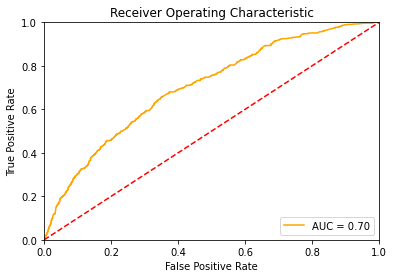

In [20]:
def plot_auc(Labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(Labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

Para solucionar esta problemática, se va a proceder a aplicar el método de GridSearchCV, para tratar de encontrar los mejores híperparámetros para que el modelo quede lo más balanceado posible y se corrija el sesgo existente, para ello se utilizará la métrica de roc_auc

In [21]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [22]:
nr.seed(3456)
param_grid = {"C": [0.01,0.1, 1, 10, 100, 1000]}
logistic_mod = linear_model.LogisticRegression(class_weight = 'balanced',max_iter=500
                                              ) 

clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.C)

0.1


In [23]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, Labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Mean performance metric = 0.719
SDT of the metric       = 0.021
Outcomes by cv fold
Fold  1    0.694
Fold  2    0.745
Fold  3    0.759
Fold  4    0.717
Fold  5    0.718
Fold  6    0.693
Fold  7    0.721
Fold  8    0.709
Fold  9    0.736
Fold 10    0.697


In [24]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])   


                 Confusion matrix
                 Score positive    Score negative
Actual positive       576              1753
Actual negative        35               500

Accuracy        0.38
AUC             0.70
Macro precision 0.58
Macro recall    0.59
 
           Positive      Negative
Num case     2329           535
Precision    0.94          0.22
Recall       0.25          0.93
F1           0.39          0.36


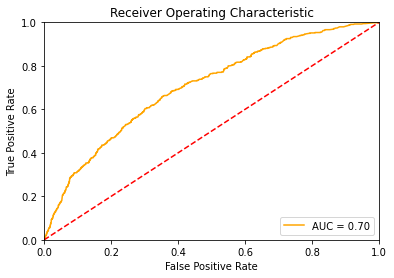

In [25]:
logistic_mod = linear_model.LogisticRegression(C = 0.1, class_weight = 'balanced') 
logistic_mod.fit(x_train, y_train)
probabilities = logistic_mod.predict_proba(x_test)
print_metrics(y_test, probabilities, 0.3)  
plot_auc(y_test, probabilities)

Tras realizar un proceso de GridSearchCV para seleccionar los mejores hiperparámetros y mejorar el sesgo que había en los datos con respecto a clasificar la mayoría de ellos como positivos, obtenemos una gran mejora en la clasificación:

* La accuracy ha empeorado pero porque antes sólo fallábamos en los casos negativos que eran los mínimos casos, actualmente vale un 0.78, lo cual no está nada mal
* El porcentaje de predicciones correctas con respecto a los casos negativos ha pasado a ser un 39% con respecto a un 8% que teníamos en el último proceso, por lo que hemos mejorado en gran parte esta medida que era lo que más nos fallaba en la anterior, poder predecir correctamente los casos negativos
* El porcentaje de predicciones correctas con respecto a los casos positivos ha pasado a ser un 86,7% de un 98% que teníamos anteriormente, pero eso es debido a que nuestro clasificador ahora no clasifica todo como positivo, hemos eliminado ese sesgo y ello hace que sea más difícil predecir realmente que caso va a ser positivo

En definitiva hemos mejorado el modelo bastante, si que es verdad que el porcentaje de acierto en los casos negativos no llega al 50%, es decir, no predecimos ni la mitad bien, pero comparado con el primer proceso, el modelo ha mejorado significativamente